# ZEWK - Hands On Datenvisualisierung, Explorative Datenanalyse in R
Seminar von Letty und Karen  

Dieses Notebook dient als Beispiel für die Implementation einer Datenvisualisierungspipeline in der Sprache R. Es kann sowohl in Jupyter als auch in Jupyter Lab ausgeführt werden, jedoch können sich einzelne Shortcuts unterscheiden.

## Benutzung von Jupyter (Lab)

Hier ein paar praktische und wichtige Kommandos und Tastenkombinationen die ihr kennen solltet:
Außerhalb einer Zelle:

* ENTER - Zelle editieren  
* strg + ENTER - Zelle ausführen  
* shift + ENTER - Zelle ausführen und zur nächsten gehen  


Innerhalb einer Zelle (Editiermodus der Zelle):

* ESC - Zelle verlassen  
* D, D - Zelle löschen  
* A - leere Zelle oberhalb (above) einfügen  
* B - leere Zelle unterhalb (below) einfügen  


## Explorative Datenanalyse
Wir haben einen unbekannten Datensatz (https://github.com/owid/covid-19-data/tree/master/public/data) und wollen herausfinden welche Daten sich darin verbergen um Arbeitshypothesen und Fragestelltungen für Visualisierungen zu entwickeln.

### Setup von hilfreichen Python Packages

In [1]:
library(dplyr)     ## Hadley Wickham's grammar of data manipulation package
library(ggplot2)   ## Hadley Wickham's grammar of graphics plotting package
library(GGally)    ## ggplot version of pairs plot
library(MASS)
library(psych)
library(tidyverse)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select



Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha


-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v tibble  3.0.4     v purrr   0.3.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x psych::%+%()    masks ggplot2::%+%()
x psych::alpha()  masks ggplot2::alpha()
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x MASS::

### Import der Daten

In [2]:
my_data <- read.csv("owid-covid-data.csv", header=TRUE, sep = "," )

### Übersicht über die Daten bekommen
Welche Parameter haben wir?
Zusammenfassung der Daten erzeugen

In [3]:
# Informationen über die verwendeten Datentypen
glimpse(my_data)

Rows: 55,247
Columns: 49
$ iso_code                           <chr> "AFG", "AFG", "AFG", "AFG", "AFG...
$ continent                          <chr> "Asia", "Asia", "Asia", "Asia", ...
$ location                           <chr> "Afghanistan", "Afghanistan", "A...
$ date                               <chr> "2019-12-31", "2020-01-01", "202...
$ total_cases                        <dbl> NA, NA, NA, NA, NA, NA, NA, NA, ...
$ new_cases                          <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ new_cases_smoothed                 <dbl> NA, NA, NA, NA, NA, NA, 0, 0, 0,...
$ total_deaths                       <dbl> NA, NA, NA, NA, NA, NA, NA, NA, ...
$ new_deaths                         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ new_deaths_smoothed                <dbl> NA, NA, NA, NA, NA, NA, 0, 0, 0,...
$ total_cases_per_million            <dbl> NA, NA, NA, NA, NA, NA, NA, NA, ...
$ new_cases_per_million              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ new_cases_smoothed_per_mi

In [4]:
# Parameterübersicht
names(my_data)

[1] "iso_code"                           "continent"                         
 [3] "location"                           "date"                              
 [5] "total_cases"                        "new_cases"                         
 [7] "new_cases_smoothed"                 "total_deaths"                      
 [9] "new_deaths"                         "new_deaths_smoothed"               
[11] "total_cases_per_million"            "new_cases_per_million"             
[13] "new_cases_smoothed_per_million"     "total_deaths_per_million"          
[15] "new_deaths_per_million"             "new_deaths_smoothed_per_million"   
[17] "icu_patients"                       "icu_patients_per_million"          
[19] "hosp_patients"                      "hosp_patients_per_million"         
[21] "weekly_icu_admissions"              "weekly_icu_admissions_per_million" 
[23] "weekly_hosp_admissions"             "weekly_hosp_admissions_per_million"
[25] "total_tests"                        "new_tests"                         
[27] "total_tests_per_thousand"           "new_tests_per_thousand"            
[29] "new_tests_smoothed"                 "new_tests_smoothed_per_thousand"   
[31] "tests_per_case"                     "positive_rate"                     
[33] "tests_units"                        "stringency_index"                  
[35] "population"                         "population_density"                
[37] "median_age"                         "aged_65_older"                     
[39] "aged_70_older"                      "gdp_per_capita"                    
[41] "extreme_poverty"                    "cardiovasc_death_rate"             
[43] "diabetes_prevalence"                "female_smokers"                    
[45] "male_smokers"                       "handwashing_facilities"            
[47] "hospital_beds_per_thousand"         "life_expectancy"                   
[49] "human_development_index"

In [5]:
# Zusammenfassung der Datentabelle
summary(my_data) # .transpose()  # für bessere konsumierbarkeit

   iso_code          continent           location             date          
 Length:55247       Length:55247       Length:55247       Length:55247      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
  total_cases         new_cases      new_cases_smoothed  total_deaths    
 Min.   :       1   Min.   : -8261   Min.   :  -552.0   Min.   :      1  
 1st Qu.:     164   1st Qu.:     0   1st Qu.:     0.9   1st Qu.:     12  
 Median :    1947   Median :    13   Median :    18.4   Median :     81  
 Mean   :  154401   Mean   :  1818   Mean   :  1782.3   Mean   :   6563  
 3rd Qu.:   20

In [6]:
describe(my_data) # taken from psych package

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
iso_code*,1,55247,1.063311e+02,6.154047e+01,106.0000,1.061236e+02,7.709520e+01,1.000,2.150000e+02,2.140000e+02,0.020771349,-1.1820655,2.618222e-01
continent*,2,55247,3.668778e+00,1.421770e+00,4.0000,3.529062e+00,1.482600e+00,1.000,7.000000e+00,6.000000e+00,0.582030218,-0.2125673,6.048882e-03
location*,3,55247,1.070614e+02,6.177495e+01,107.0000,1.070075e+02,7.857780e+01,1.000,2.150000e+02,2.140000e+02,0.006365139,-1.1916126,2.628198e-01
date*,4,55247,1.803795e+02,8.015154e+01,183.0000,1.829202e+02,9.785160e+01,1.000,3.130000e+02,3.120000e+02,-0.198299015,-0.9189369,3.410025e-01
total_cases,5,51615,1.544013e+05,1.551656e+06,1947.0000,1.254465e+04,2.867348e+03,1.000,4.937324e+07,4.937323e+07,20.331731287,480.1423553,6.829790e+03
new_cases,6,54324,1.817666e+03,1.672939e+04,13.0000,1.296905e+02,1.927380e+01,-8261.000,5.841280e+05,5.923890e+05,18.745471002,427.1771168,7.177681e+01
new_cases_smoothed,7,53524,1.782345e+03,1.621142e+04,18.4290,1.336606e+02,2.732284e+01,-552.000,5.209941e+05,5.215461e+05,18.203764544,396.4741552,7.007238e+01
total_deaths,8,42439,6.562907e+03,5.325832e+04,81.0000,4.951538e+02,1.171254e+02,1.000,1.243083e+06,1.243082e+06,15.833616918,283.9626679,2.585264e+02
new_deaths,9,54324,4.576235e+01,3.800177e+02,0.0000,2.233433e+00,0.000000e+00,-1918.000,1.049100e+04,1.240900e+04,14.715061997,246.2876402,1.630452e+00


In [7]:
# Übersicht der vorhandenen Kontinente
unique(my_data$continent)

[1] "Asia"          "Europe"        "Africa"        "North America"
[5] "South America" "Oceania"       ""

In [8]:
# wie viele einträge haben wir pro kontinent?
table(my_data$continent)


                     Africa          Asia        Europe North America 
          626         13087         13061         14325          8756 
      Oceania South America 
         2118          3274 

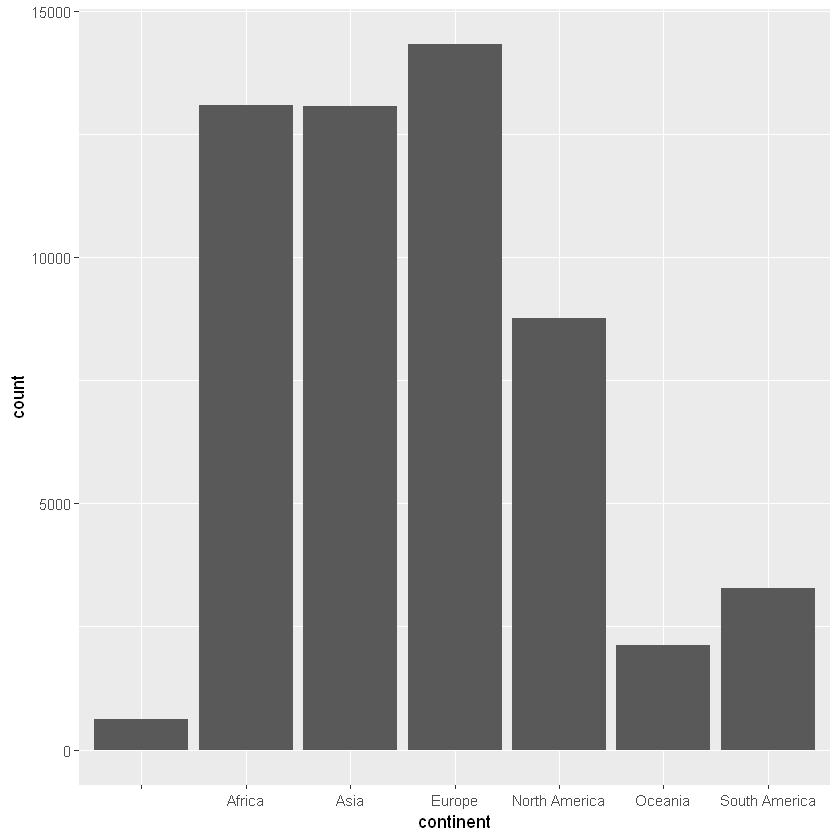

In [9]:
# wie viele einträge haben wir pro kontinent? als Graphik
ggplot(data = my_data) + geom_bar(mapping = aes(x = continent))

In [10]:
# Ausgabe eines bestimmten parameters (hier total_cases) gruppiert nach continent
describeBy(my_data$total_cases,my_data$continent)


 Descriptive statistics by group 
group: 
   vars   n    mean       sd median trimmed    mad min      max    range skew
X1    1 590 6756146 12156164    705 3779983 957.76  10 49373235 49373225 1.85
   kurtosis       se
X1     2.31 500461.4
------------------------------------------------------------ 
group: Africa
   vars     n    mean       sd median trimmed     mad min    max  range skew
X1    1 12784 13220.2 61321.84   1378 3243.69 1995.58   1 734175 734174  9.3
   kurtosis     se
X1    92.95 542.35
------------------------------------------------------------ 
group: Asia
   vars     n     mean       sd median  trimmed     mad min     max   range
X1    1 11740 94046.59 521040.7   5567 25531.95 8225.46   1 8462080 8462079
    skew kurtosis      se
X1 12.11   159.25 4808.81
------------------------------------------------------------ 
group: Europe
   vars     n     mean       sd median  trimmed     mad min     max   range
X1    1 12838 57378.79 160655.4   4474 18722.87 6556.06   1 1

In [11]:
# Ausgabe eines bestimmten parameters (hier total_cases) gruppoert nach continent
describeBy(my_data$weekly_icu_admissions_per_million,my_data$continent)

Warning message in min(x, na.rm = na.rm):
"kein nicht-fehlendes Argument für min; gebe Inf zurück"
Warning message in max(x, na.rm = na.rm):
"kein nicht-fehlendes Argument für max; gebe -Inf zurück"
Warning message in min(x, na.rm = na.rm):
"kein nicht-fehlendes Argument für min; gebe Inf zurück"
Warning message in max(x, na.rm = na.rm):
"kein nicht-fehlendes Argument für max; gebe -Inf zurück"
Warning message in min(x, na.rm = na.rm):
"kein nicht-fehlendes Argument für min; gebe Inf zurück"
Warning message in max(x, na.rm = na.rm):
"kein nicht-fehlendes Argument für max; gebe -Inf zurück"
Warning message in min(x, na.rm = na.rm):
"kein nicht-fehlendes Argument für min; gebe Inf zurück"
Warning message in max(x, na.rm = na.rm):
"kein nicht-fehlendes Argument für max; gebe -Inf zurück"
Warning message in min(x, na.rm = na.rm):
"kein nicht-fehlendes Argument für min; gebe Inf zurück"
Warning message in max(x, na.rm = na.rm):
"kein nicht-fehlendes Argument für max; gebe -Inf zurück"
Warni


 Descriptive statistics by group 
group: 
   vars n mean sd median trimmed mad min  max range skew kurtosis se
X1    1 0  NaN NA     NA     NaN  NA Inf -Inf  -Inf   NA       NA NA
------------------------------------------------------------ 
group: Africa
   vars n mean sd median trimmed mad min  max range skew kurtosis se
X1    1 0  NaN NA     NA     NaN  NA Inf -Inf  -Inf   NA       NA NA
------------------------------------------------------------ 
group: Asia
   vars n mean sd median trimmed mad min  max range skew kurtosis se
X1    1 0  NaN NA     NA     NaN  NA Inf -Inf  -Inf   NA       NA NA
------------------------------------------------------------ 
group: Europe
   vars   n mean   sd median trimmed  mad min   max range skew kurtosis   se
X1    1 328 4.74 8.96   1.37    2.59 1.99   0 67.03 67.03 3.64    16.13 0.49
------------------------------------------------------------ 
group: North America
   vars n mean sd median trimmed mad min  max range skew kurtosis se
X1    1 0  

In [12]:
# Auswahl von Daten
# Aggregation der GDPR Daten pro Land 
# (die Daten sind für jeden zeitlichen Eintrag gleich, dadurch brauchen wir nur jeweils den ersten Eintrag)
data_gdp <- my_data[!duplicated(my_data$location), ] 

# Nur daten von Deutschland
data_DE <- my_data[my_data$location == "Germany", ] 


### Analyse fehlender Werte

In [13]:
# wie viel prozent der Daten fehlen pro Parameter?
apply(my_data, 2, function(col)sum(is.na(col))/length(col))

iso_code                          continent 
                       0.000000000                        0.000000000 
                          location                               date 
                       0.000000000                        0.000000000 
                       total_cases                          new_cases 
                       0.065741126                        0.016706790 
                new_cases_smoothed                       total_deaths 
                       0.031187214                        0.231831593 
                        new_deaths                new_deaths_smoothed 
                       0.016706790                        0.031187214 
           total_cases_per_million              new_cases_per_million 
                       0.070754973                        0.017865223 
    new_cases_smoothed_per_million           total_deaths_per_million 
                       0.032363748                        0.236573932 
            new_deaths_per_million    new_deaths_smoothed_per_million 
                       0.017865223                        0.032363748 
                      icu_patients           icu_patients_per_million 
                       0.929914747                        0.929914747 
                     hosp_patients          hosp_patients_per_million 
                       0.917407280                        0.917407280 
             weekly_icu_admissions  weekly_icu_admissions_per_million 
                       0.994063026                        0.994063026 
            weekly_hosp_admissions weekly_hosp_admissions_per_million 
                       0.989736999                        0.989736999 
                       total_tests                          new_tests 
                       0.619092439                        0.623852879 
          total_tests_per_thousand             new_tests_per_thousand 
                       0.619092439                        0.623852879 
                new_tests_smoothed    new_tests_smoothed_per_thousand 
                       0.574746140                        0.574746140 
                    tests_per_case                      positive_rate 
                       0.606277264                        0.599652470 
                       tests_units                   stringency_index 
                       0.000000000                        0.176281065 
                        population                 population_density 
                       0.005665466                        0.052364834 
                        median_age                      aged_65_older 
                       0.110232230                        0.123608522 
                     aged_70_older                     gdp_per_capita 
                       0.114865966                        0.121943273 
                   extreme_poverty              cardiovasc_death_rate 
                       0.414683150                        0.110666643 
               diabetes_prevalence                     female_smokers 
                       0.078248593                        0.307491810 
                      male_smokers             handwashing_facilities 
                       0.316415371                        0.579542781 
        hospital_beds_per_thousand                    life_expectancy 
                       0.198635220                        0.018426340 
           human_development_index 
                       0.141491846

In [14]:
# wie viel fehlende werte (in prozent) haben wir in den Daten zu Europa?
data_EU  <- my_data[my_data$continent == "Europe", ] 
apply(data_EU, 2, function(col)sum(is.na(col))/length(col))

iso_code                          continent 
                        0.00000000                         0.00000000 
                          location                               date 
                        0.00000000                         0.00000000 
                       total_cases                          new_cases 
                        0.10380454                         0.01047120 
                new_cases_smoothed                       total_deaths 
                        0.02317627                         0.21710297 
                        new_deaths                new_deaths_smoothed 
                        0.01047120                         0.02317627 
           total_cases_per_million              new_cases_per_million 
                        0.10380454                         0.01047120 
    new_cases_smoothed_per_million           total_deaths_per_million 
                        0.02317627                         0.21710297 
            new_deaths_per_million    new_deaths_smoothed_per_million 
                        0.01047120                         0.02317627 
                      icu_patients           icu_patients_per_million 
                        0.72970332                         0.72970332 
                     hosp_patients          hosp_patients_per_million 
                        0.68146597                         0.68146597 
             weekly_icu_admissions  weekly_icu_admissions_per_million 
                        0.97710297                         0.97710297 
            weekly_hosp_admissions weekly_hosp_admissions_per_million 
                        0.96041885                         0.96041885 
                       total_tests                          new_tests 
                        0.48963351                         0.49116928 
          total_tests_per_thousand             new_tests_per_thousand 
                        0.48963351                         0.49116928 
                new_tests_smoothed    new_tests_smoothed_per_thousand 
                        0.42282723                         0.42282723 
                    tests_per_case                      positive_rate 
                        0.43553229                         0.43497382 
                       tests_units                   stringency_index 
                        0.00000000                         0.20369983 
                        population                 population_density 
                        0.00000000                         0.04935428 
                        median_age                      aged_65_older 
                        0.19350785                         0.19350785 
                     aged_70_older                     gdp_per_capita 
                        0.21137871                         0.15497382 
                   extreme_poverty              cardiovasc_death_rate 
                        0.39930192                         0.17640489 
               diabetes_prevalence                     female_smokers 
                        0.11574171                         0.19825480 
                      male_smokers             handwashing_facilities 
                        0.19825480                         0.94827225 
        hospital_beds_per_thousand                    life_expectancy 
                        0.13284468                         0.04921466 
           human_development_index 
                        0.15944154

### Ausreißer

In [15]:
average_gdp = mean(data_gdp$gdp_per_capita, na.rm=TRUE)
std_gdp = sd(data_gdp$gdp_per_capita, na.rm=TRUE)
data_gdp[which(data_gdp$gdp_per_capita > (average_gdp + 2*std_gdp)), ]
# average_gdp + 2*std_gdp

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7601,BRN,Asia,Brunei,2020-03-10,1,1,NA,NA,0,NA,...,71809.25,NA,201.285,12.79,2.0,30.9,NA,2.70,75.86,0.853
24361,IRL,Europe,Ireland,2019-12-31,NA,0,NA,NA,0,NA,...,67335.29,0.2,126.459,3.28,23.0,25.7,NA,2.96,82.30,0.938
27290,KWT,Asia,Kuwait,2019-12-31,NA,0,NA,NA,0,NA,...,65530.54,NA,132.235,15.84,2.7,37.0,NA,2.00,75.49,0.803
29853,LUX,Europe,Luxembourg,2019-12-31,NA,0,NA,NA,0,NA,...,94277.96,0.2,128.275,4.42,20.9,26.0,NA,4.51,82.25,0.904
37196,NOR,Europe,Norway,2019-12-31,NA,0,NA,NA,0,NA,...,64800.06,0.2,114.316,5.31,19.6,20.7,NA,3.60,82.40,0.953
40398,QAT,Asia,Qatar,2019-12-31,NA,0,NA,NA,0,NA,...,116935.60,NA,176.690,16.52,0.8,26.9,NA,1.20,80.23,0.856
44021,SGP,Asia,Singapore,2019-12-31,NA,0,NA,NA,0,NA,...,85535.38,NA,92.243,10.99,5.2,28.3,NA,2.40,83.62,0.932
51291,ARE,Asia,United Arab Emirates,2019-12-31,NA,0,NA,NA,0,NA,...,67293.48,NA,317.840,17.26,1.2,37.4,NA,1.20,77.97,0.863


In [16]:
data_gdp[which(data_gdp$gdp_per_capita < (average_gdp - 2*std_gdp)), ]

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"


iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


### Einfache visualisierungen - Verteilungsanalyse

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 29 rows containing non-finite values (stat_bin)."
Saving 6.67 x 6.67 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 29 rows containing non-finite values (stat_bin)."


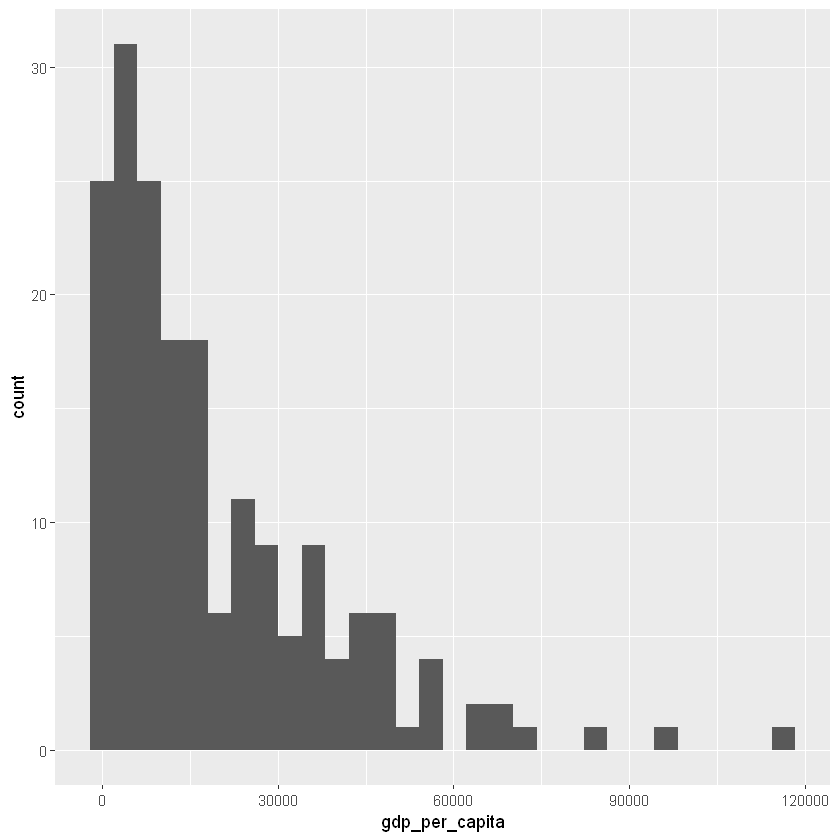

In [17]:
ggplot(data = data_gdp, aes(x=gdp_per_capita)) + geom_histogram()
ggsave(file="test.svg")